# EXPLORATORY DATA ANALYSIS ON BREAST CANCER DATASET
### By Rosita Nimalin 



**Dataset Description:**
- Diagnosis : M = Malignant, B = Benign
- Radius : Mean of distances from center to points on the perimeter
- Texture : Standard Deviation of gray-scale values
- Perimeter 
- Area
- Smoothness = local variation in radius lengths
- Compactness = Perimeter^2/(area-1.0)
- Concavity = Severity of concave portions of the contour
- concave points = number of concave portions of the contour
- Symmetry



# Loading Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [2]:
BC_df = pd.read_csv('BreastCancer.csv')

## Diving into the dataset

In [3]:
BC_df.shape #dimension of the dataset

(569, 33)

The Breast Cancer dataset has 569 rows and 33 columns.

In [4]:
BC_df.head()  #displaying first 5 rows of the dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


From the result, we note that:

- id column - for unique identity of the row which irrelevant for the classification.
- diagonosis feature is categorical(M = malignant, B = benign)

In [5]:
BC_df.info()  #to know the data shape of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

From the given information of the dataset, it implies that the features are computed with the mean, standard error (SE) and worst of each image. 

In [6]:
BC_df.iloc[:,-1].unique() #to know if there are any other values in the unnamed column

array([nan])

In [7]:
#to drop the id, diagnosis, unnamed columns from the dataset

y = BC_df.diagnosis #target class

drop_cols = ['Unnamed: 32','id','diagnosis']

x = BC_df.drop(drop_cols, axis = 1)
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Plotting Diagnosis Distribution

Count of Benign Tumors: 357
Count of Malign Tumors: 212


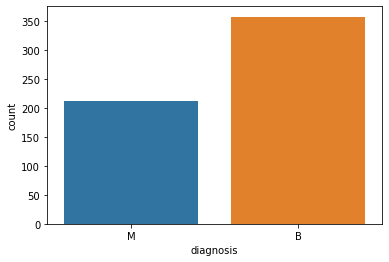

In [8]:
ax = sns.countplot(y, label = 'Count') #histogram across the target class (diagnosis) which is categorical
B, M = y.value_counts()
print("Count of Benign Tumors:",B)

print("Count of Malign Tumors:",M)

In [9]:
x.describe() #summary (mean, std, quartiles, min and max)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Result: We need to normalise the data as we can see that the values across features varies alot.

In [10]:
data = x
data_std = (data - data.mean()) / data.std()  #normalising the data
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
data = pd.concat([y, data_std.iloc[:,:10]],axis = 1) #extracted 10 features from the dataset

data.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764
1,M,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889
2,M,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658
3,M,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602
4,M,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956


In [12]:
data = pd.melt(data, id_vars='diagnosis', var_name = 'features', value_name = 'value') #unpivoting the datatable

data

,diagnosis,features,value
0,M,radius_mean,1.096100
1,M,radius_mean,1.828212
2,M,radius_mean,1.578499
3,M,radius_mean,-0.768233
4,M,radius_mean,1.748758
...,...,...,...
5685,M,fractal_dimension_mean,-0.930209
5686,M,fractal_dimension_mean,-1.057681
5687,M,fractal_dimension_mean,-0.894800
5688,M,fractal_dimension_mean,1.042778


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

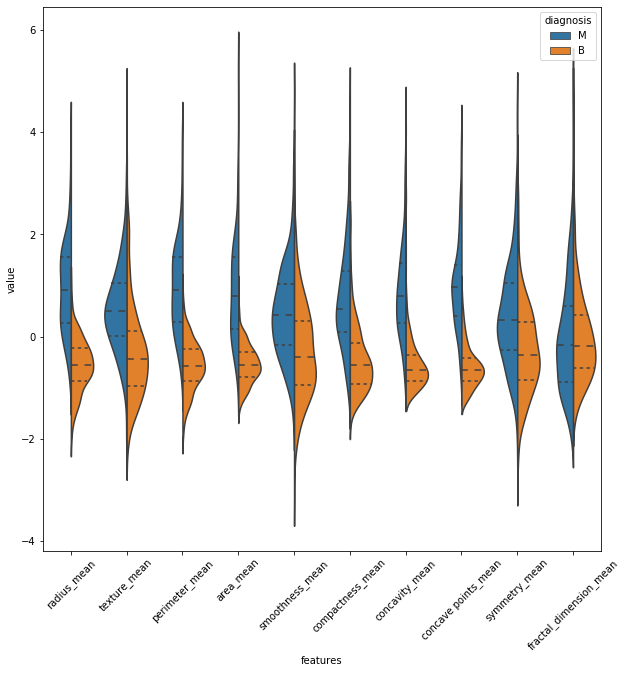

In [13]:
#to plot violinpolt
plt.figure(figsize = (10,10))
sns.violinplot(x ='features', y = 'value', hue = 'diagnosis', data = data, split = True, inner='quart')
plt.xticks(rotation = 45) #xlabels are rotated to 45 degrees so that it does not overlap

From the plot Malign and Benign for fractal_dimension_mean feature, the median almost same while the it differs for the other features. Thus, the feature cannot give good information for the classification.

## Violin Plot for next 10 features


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

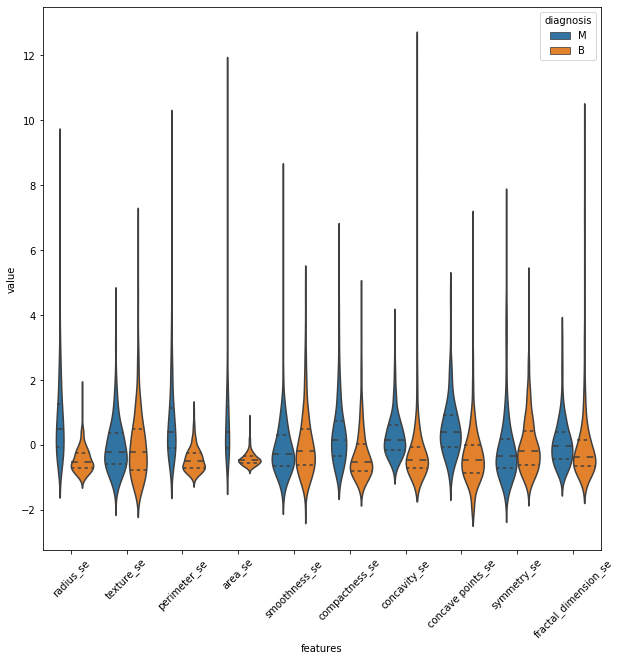

In [14]:
data = pd.concat([y, data_std.iloc[:,10:20]],axis = 1)
data = pd.melt(data, id_vars='diagnosis', var_name = 'features', value_name = 'value')
plt.figure(figsize = (10,10))
sns.violinplot(x ='features', y = 'value', hue = 'diagnosis', data = data, inner='quart') # here the split is False
plt.xticks(rotation = 45) 




## Violin plot for the last 10 features

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

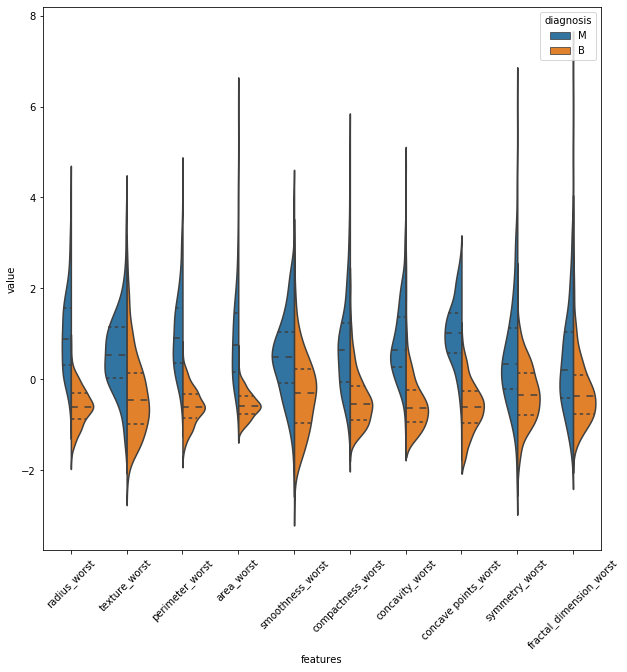

In [15]:
data = pd.concat([y, data_std.iloc[:,20:30]],axis = 1)
data = pd.melt(data, id_vars='diagnosis', var_name = 'features', value_name = 'value')
plt.figure(figsize = (10,10))
sns.violinplot(x ='features', y = 'value', hue = 'diagnosis', data = data, split = True, inner='quart')
plt.xticks(rotation = 45) #xlabels are rotated to 45 degrees so that it does not overlap

From the plot we see that the features **concavity_worst** and **concave points_worst** looks correlated

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

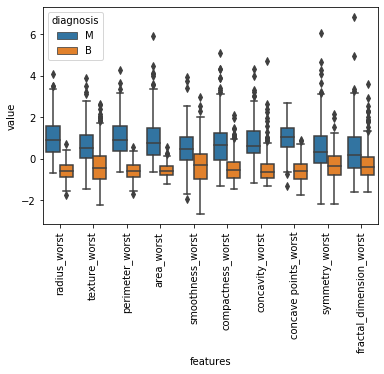

In [16]:
sns.boxplot(x = 'features', y = 'value',hue = 'diagnosis',data = data)
plt.xticks(rotation = 90)

To find the correlation between the **concavity_worst** and **concave points_worst** using the jointplot from seaborn library

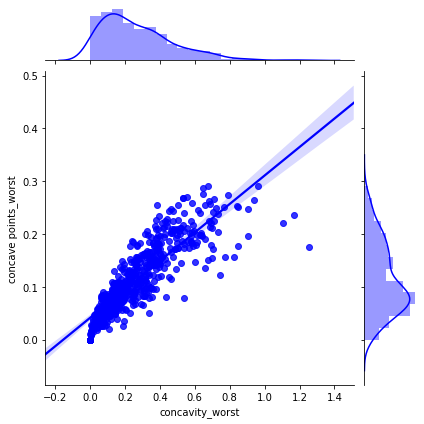

In [17]:
sns.jointplot(x.loc[:,'concavity_worst'],
            x.loc[:,'concave points_worst'], kind = 'regg', color = 'blue')

**Result**: The two variables are highly correlated

### Using Swarmplot to view the features

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

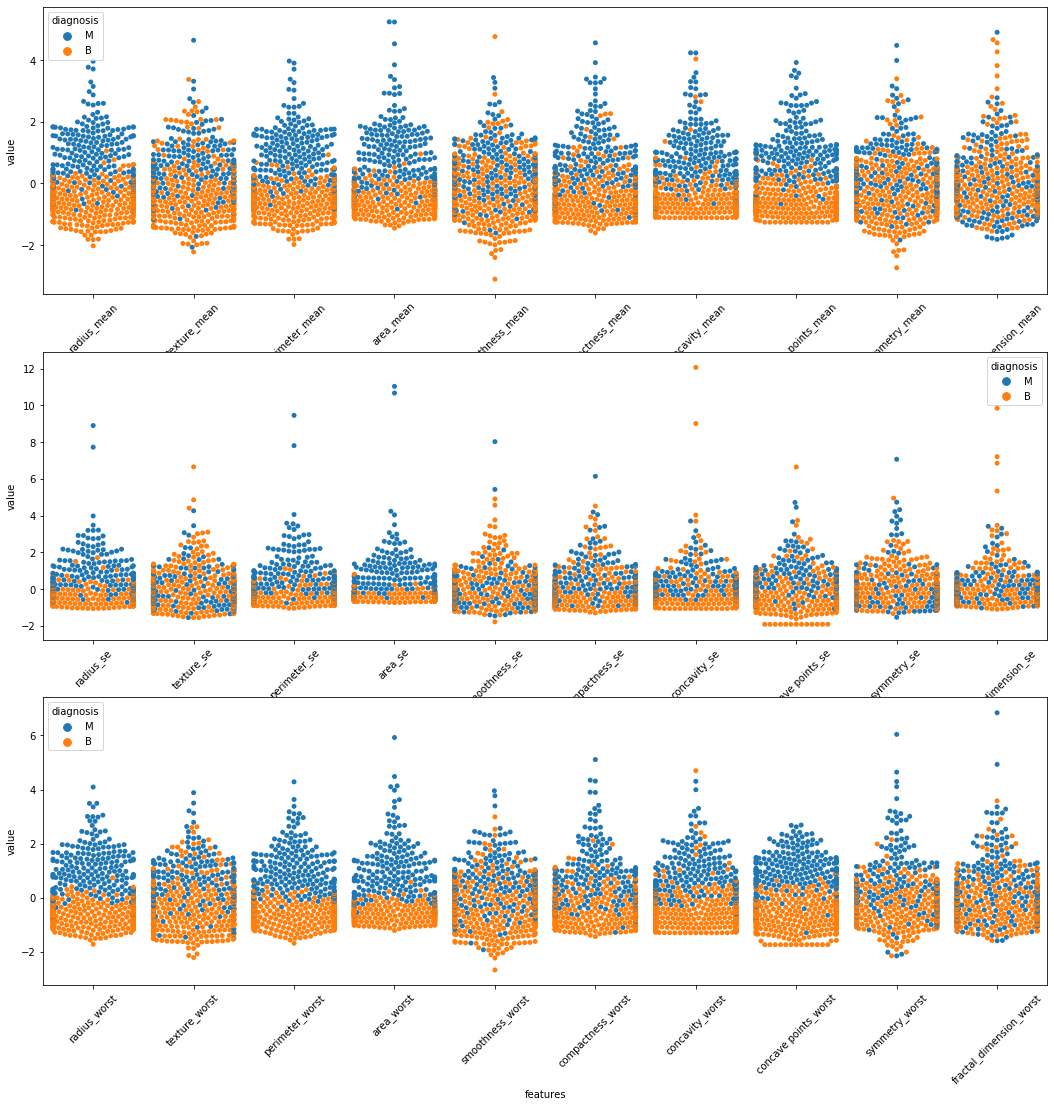

In [18]:
plt.figure(figsize = (18,18))

plt.subplot(3,1,1)
data = pd.concat([y, data_std.iloc[:,:10]],axis = 1)
data = pd.melt(data, id_vars='diagnosis', var_name = 'features', value_name = 'value')
#plt.figure(figsize = (10,10))
sns.swarmplot(x ='features', y = 'value', hue = 'diagnosis', data = data)
plt.xticks(rotation = 45)


plt.subplot(3,1,2)
data1 = pd.concat([y, data_std.iloc[:,10:20]],axis = 1)
data1 = pd.melt(data1, id_vars='diagnosis', var_name = 'features', value_name = 'value')
#plt.figure(figsize = (10,10))
sns.swarmplot(x ='features', y = 'value', hue = 'diagnosis', data = data1)
plt.xticks(rotation = 45)

plt.subplot(3,1,3)
data = pd.concat([y, data_std.iloc[:,20:30]],axis = 1)
data = pd.melt(data, id_vars='diagnosis', var_name = 'features', value_name = 'value')
#plt.figure(figsize = (10,10))
sns.swarmplot(x ='features', y = 'value', hue = 'diagnosis', data = data)
plt.xticks(rotation = 45)




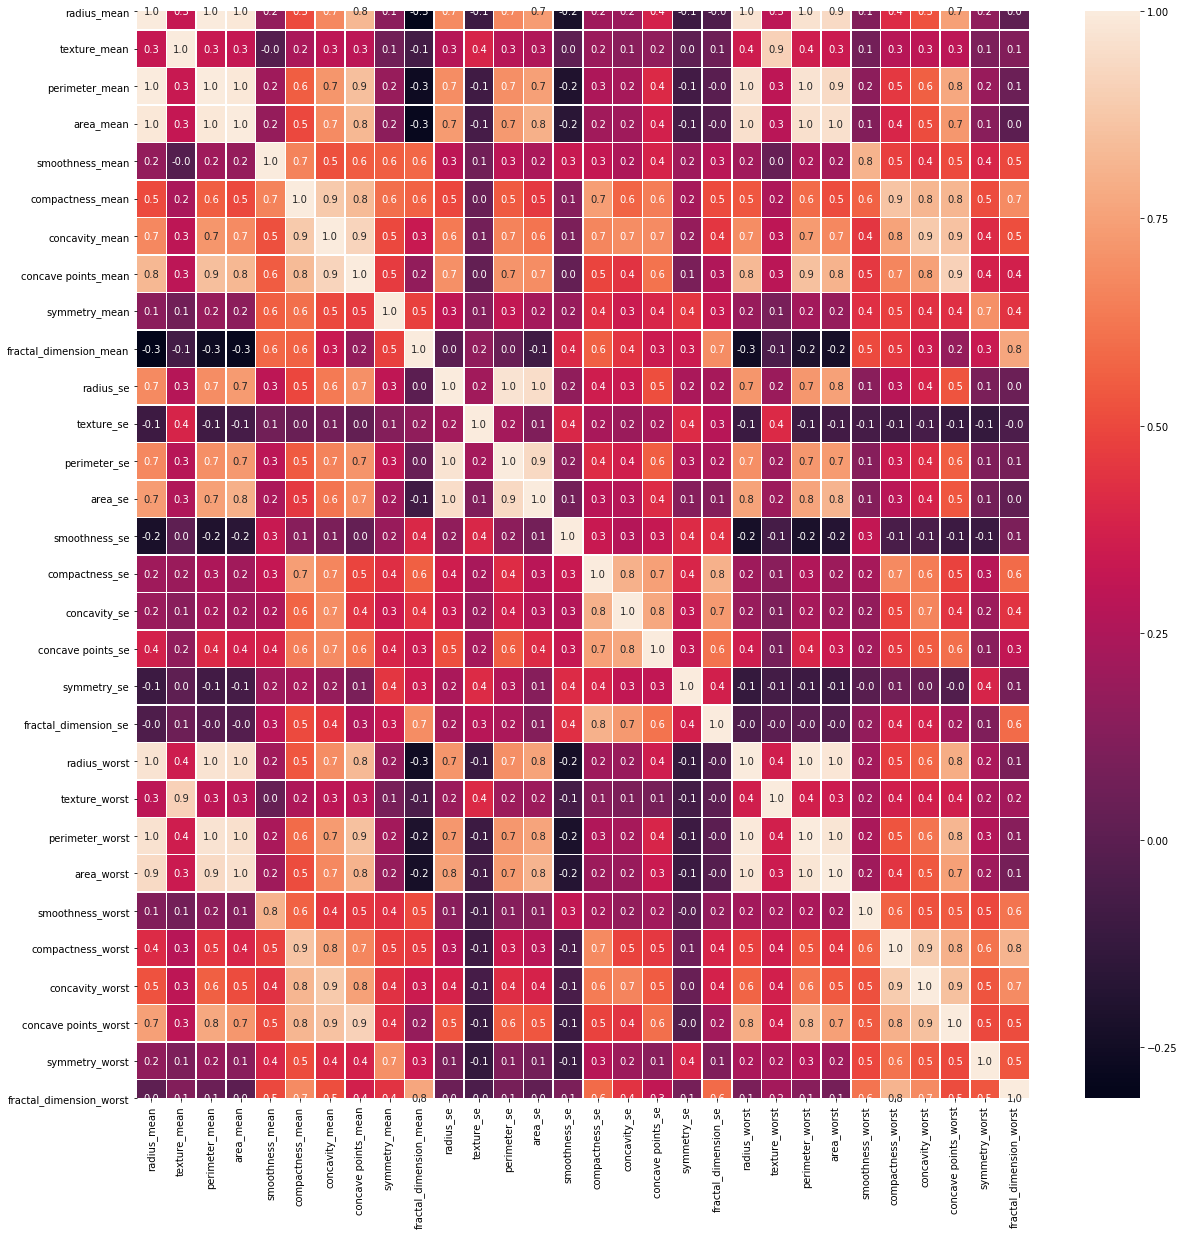

In [20]:
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(x.corr(), annot=True, linewidth =.5, fmt ='.1f', ax = ax)